# Desafio dos Pixels Strider

1. Contar a quantidade que pontos vermelhos na imagem;
2. Encontrar a frase escondida nos pontos;

In [1]:
import sys
import cv2
import numpy as np
from matplotlib import pyplot as plt

## Desafio 1

O desafio 1 consiste em contar os pixels vermelhos espalhados na imagem dada. Para isso foi utilizada a biblioteca OpenCV onde é possível representar a imagem como uma matriz de pixels e aplicar operações utilizando vetores numericos da biblioteca Numpy de forma a filtrar os pixels de um determinado espectro, nesse caso vermelho (0,0,255 BGR).

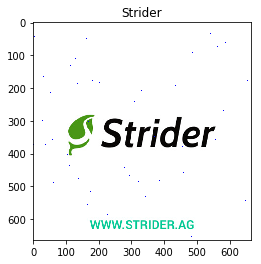

O número de pixels vermelhos é: 299


In [2]:
def count_red_pixels(image):
    """
    Conta o numero de pixels vermelhos na imagem, sendo considerado vermelho
    apenas os pixels dentro do padrão dado (0,0,255 - BGR)
    """
    img = cv2.imread(image)

    RED_MIN = np.array([0, 0, 255], np.uint8)
    RED_MAX = np.array([0, 0, 255], np.uint8)

    result = cv2.inRange(img, RED_MIN, RED_MAX)
    cred_pixels = cv2.countNonZero(result)

    plt.imshow(img)
    plt.title('Strider')
    plt.show()
    print('O número de pixels vermelhos é: ' + str(cred_pixels))

count_red_pixels("strider.png")

## Desafio 2

Os códigos abaixo representam tentativas de solucionar o desafio 2 até o momento.

### Heurística 1

Considerando o espaço entre os pixels vermelhos como sendo caracteres ascii que juntos formariam a frase secreta.

In [3]:
def numbers(image):
    img = cv2.imread(image)

    x = 0
    for rows in img:
        for node in rows:
            if node[0] == 0 and node[1] == 0 and node[2] == 255:
                print (x),
                x = 0
            else:
                x += 1;
    print (x)

numbers("strider.png")

806 1095 100 5486 2424 1054 586 1555 4719 1640 208 542 1018 707 426 666 732 1364 524 1271 1556 720 1661 1554 924 3423 1100 1013 2852 2807 2242 1441 822 552 73 2339 303 91 965 1585 1365 2570 1090 1559 2502 6300 1119 936 753 644 578 4764 3008 385 958 686 442 3100 604 983 2089 3720 852 1881 2667 895 1558 6301 714 217 101 955 408 1494 389 849 215 985 1904 808 471 140 3391 814 323 785 178 607 6 1242 1424 447 372 1675 1995 1446 258 3432 1044 1776 1929 528 157 788 1429 7785 2415 426 325 391 246 671 2576 774 323 3252 2167 1072 3789 423 1370 5148 970 3921 51 71 206 524 6528 2959 267 2030 166 3298 2132 513 112 765 1694 464 1071 1135 3210 785 1819 184 1741 127 1103 82 845 1239 294 891 411 1818 540 174 377 2685 5976 383 2066 1521 1691 350 144 642 566 1180 2769 701 3481 53 15 654 36 95 1951 2352 345 2435 54 481 890 311 1021 1212 653 3630 243 3806 492 2037 1330 278 1791 1474 2297 830 3076 4332 1970 3156 2177 511 1460 1709 1406 1117 1863 4040 2519 54 664 127 2442 637 1465 630 2460 624 2209 2020 1423 

Foram feitas diversas tentativas com esse método, aplicando variadas formas de conversão dos valores encontrados nas distãncias. No caso abaixo os valores foram transformados em números entre 32 e 122, que na tabela ascii correspondem aos caracteres gramaticais.

In [4]:
def numbers_mod(image):
    img = cv2.imread(image)

    x = 0
    for rows in img:
        for node in rows:
            if node[0] == 0 and node[1] == 0 and node[2] == 255:
                print (x%91+32),
                x = 0
            else:
                x += 1;
    print (x%91+32)

numbers_mod("strider.png")

110 35 41 58 90 85 72 40 110 34 58 119 49 102 94 61 36 122 101 120 41 115 55 39 46 88 40 44 63 109 90 108 35 38 105 96 62 32 87 70 32 54 121 44 77 53 59 58 57 39 64 64 37 53 80 81 110 38 90 105 119 112 65 93 60 108 43 54 109 67 42 77 76 70 57 62 65 107 116 112 48 81 56 118 82 89 119 93 38 91 91 115 40 69 116 113 108 97 75 79 50 105 98 92 96 82 81 94 84 59 96 66 60 78 82 99 106 103 90 91 37 84 92 40 83 103 56 101 99 79 117 60 107 54 71 90 53 69 88 41 102 75 57 89 122 34 44 68 43 114 58 88 53 104 79 121 117 115 45 78 93 51 96 97 85 109 85 37 52 120 71 96 55 85 47 49 68 36 72 109 104 101 86 58 103 70 52 61 48 113 93 107 69 67 88 37 94 50 54 43 105 87 91 94 116 88 36 103 73 57 75 68 94 86 59 68 108 32 41 116 35 110 57 50 90 80 97 60 53 114 114 62 65 76 79 94 87 71 98 85 85 57 32 67 84 39 32 54 90 55 39 115 63 82 52 90 91 66 47 108 119 110 46 92 81 64 38 49 75 47 77 118 93 54 62 37 46 85 108 53 96 76 51 41 115 75 54 113 65 85 68 48 98 43 118 41 53 50 48 55


In [5]:
def numbers_char(image):
    img = cv2.imread(image)

    j = 0
    x = 0
    for rows in img:
        for node in rows:
            if node[0] == 0 and node[1] == 0 and node[2] == 255:
                print (chr(x%91+32)),
                x = 0
            else:
                x += 1;
    print (chr(x%91+32))

numbers_char("strider.png")

n # ) : Z U H ( n " : w 1 f ^ = $ z e x ) s 7 ' . X ( , ? m Z l # & i ` >   W F   6 y , M 5 ; : 9 ' @ @ % 5 P Q n & Z i w p A ] < l + 6 m C * M L F 9 > A k t p 0 Q 8 v R Y w ] & [ [ s ( E t q l a K O 2 i b \ ` R Q ^ T ; ` B < N R c j g Z [ % T \ ( S g 8 e c O u < k 6 G Z 5 E X ) f K 9 Y z " , D + r : X 5 h O y u s - N ] 3 ` a U m U % 4 x G ` 7 U / 1 D $ H m h e V : g F 4 = 0 q ] k E C X % ^ 2 6 + i W [ ^ t X $ g I 9 K D ^ V ; D l   ) t # n 9 2 Z P a < 5 r r > A L O ^ W G b U U 9   C T '   6 Z 7 ' s ? R 4 Z [ B / l w n . \ Q @ & 1 K / M v ] 6 > % . U l 5 ` L 3 ) s K 6 q A U D 0 b + v ) 5 2 0 7
